<a id='problemsize'></a>
# Problemsize
### How does the problem size influence execution time, speed-up and efficiency for a fix amount of threads ?

### Which program do you want to test ?

In the following code line, replace the last word `pi` with the program name you want to test. Then run all the code lines (and be patient). 

These are your options:
- pi
- jacobi
- fibonacci
- findprime
- mandelbrot
- quicksort
- mergesort
- bubblesort
- selectionsort
- matrixmultiplication

You can also test your own program. Check the readme file to find out how to do this.

In [3]:
%cd ~/work/Thesis/programs/matrixmultiplication

/home/jovyan/work/Thesis/programs/matrixmultiplication


In [25]:
import numpy as np

problemsize = np.array([320,640,960,1280]) 
threads = 32

You have to manually adjust the time measurements in the following code cell, so it measures with the problem size and thread number you decided on. The values you set for the variables 'threads' and 'problem_size' in the previous code cell have to match the values you pass as arguments in the following code cell. Remember, the first argument you pass is the thread number, the second argument is the number of repeats, and the third argument is the problem size. You have to type out the full number in the terminal command; something like '1e5*8' will not work. `>/dev/null` supresses the terminal output.

In [26]:
# parallel time
time_parallel = []
time_serial = []

! ./timing.o 32 5 320 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 320 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 32 5 640 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 640 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 32 5 960 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 960 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 32 5 1280 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 1280 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))

In [27]:
# calculate speedup and efficiency
speedup = np.array(time_serial)/np.array(time_parallel)
efficiency = speedup/threads

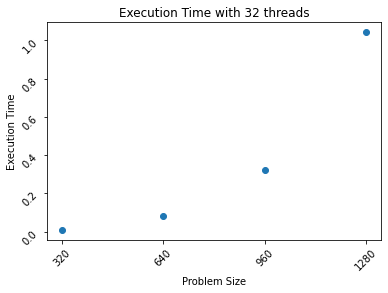

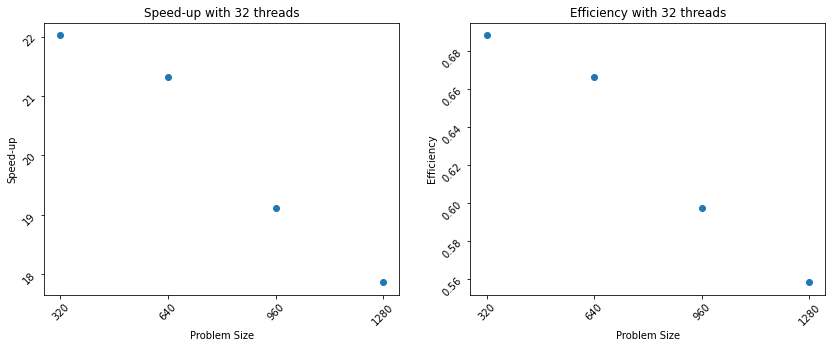

In [28]:
# plot results
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(problemsize,time_parallel)
ax.set_xticks(problemsize)
ax.set_xticklabels(problemsize)
ax.set_ylabel('Execution Time')
ax.set_xlabel('Problem Size')
ax.set_title("Execution Time with " + str(threads)+' threads')
ax.tick_params(rotation=45)

fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].scatter(problemsize,speedup)
ax[0].set_xticks(problemsize)
ax[0].set_xticklabels(problemsize)
ax[0].set_ylabel('Speed-up')
ax[0].set_xlabel('Problem Size')
ax[0].set_title("Speed-up with " + str(threads)+' threads')
ax[0].tick_params(rotation=45)

ax[1].scatter(problemsize,efficiency)
ax[1].set_xticks(problemsize)
ax[1].set_xticklabels(problemsize)
ax[1].set_ylabel('Efficiency')
ax[1].set_xlabel('Problem Size')
ax[1].set_title("Efficiency with " + str(threads)+' threads')
ax[1].tick_params(rotation=45);